In [5]:
import pandas as pd

In [6]:
ratings = pd.read_csv('data/ratings_small.csv', encoding='utf-8', sep=',')

In [7]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [8]:
matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

matrix = matrix.fillna(0)
matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
A = matrix.values
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

## Passo 1
Vamos escolher aleatoriamente um dos elementos da matriz $A$ e atribuir a ele um valor aleatório, gerando a matriz $B$, isto é, a matriz $B$ é igual à matriz $A$ com um dos elementos "estragado".

In [10]:
import random

A.shape

(671, 9066)

In [11]:
linha = 670
coluna = 0
print(A[linha][coluna])
B = A

B[linha][coluna] = 1

print(B.shape[0])
print(B.shape[1])


5.0
671
9066


O sistema receberá como entrada a matriz $B$ e a posição $i,j$ do valor aleatório. Neste momento, ele não teve acesso à matriz $A$, e, portanto, não tem como saber qual é o valor "real".


O sistema deverá retornar o valor real que estava na matriz $A$.

In [12]:
from scipy.linalg import svd, diagsvd

In [13]:
u, s, vt = svd(B)

In [14]:
s = s
s[:100] *= 0

sigma = diagsvd(s, u.shape[1], vt.shape[0])
newA = u @ sigma @ vt

In [15]:
print(newA[linha][coluna])

-1.382506429468082


In [16]:
def processo(A):
    linha = random.randint(0, A.shape[0]-1)
    coluna = random.randint(0, A.shape[1]-1)
    valor_original = A[linha][coluna]

    A[linha][coluna] = 1

    B = A
    u, s, vt = svd(B)
    s = s
    s[:100] *= 0

    sigma = diagsvd(s, u.shape[1], vt.shape[0])
    newA = u @ sigma @ vt

    return valor_original - newA[linha][coluna]

In [18]:
import matplotlib.pyplot as plt

erros = []
for i in range(5):
    erros.append(processo(A))

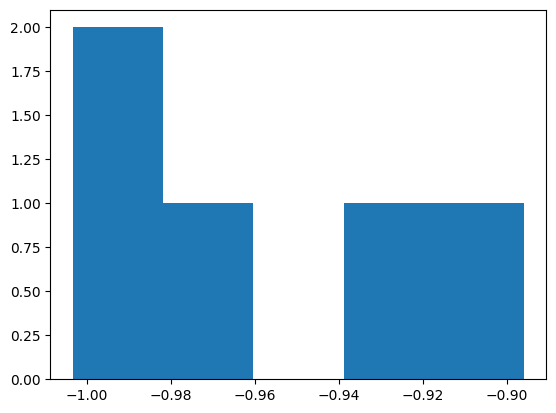

In [20]:
plt.hist(erros, bins=5)
plt.show()